In [ ]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [ ]:
x_train.shape

(25000, 500)

In [ ]:
y_test.shape

(25000,)

In [ ]:
y_train.shape

(25000,)

In [ ]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_test_one_hot.shape

(25000, 2)

In [ ]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))

################## lstm ######################################
model.add(layers.LSTM(32))  # p 8320 = (32*32   +  32*32       +32)  *  4
################## lstm ######################################

model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 328386 (1.25 MB)
Trainable params: 328386 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 66s 406ms/step - loss: 0.6606 - acc: 0.6035 - val_loss: 0.5483 - val_acc: 0.7484
Epoch 2/10
157/157 [==============================] - 61s 390ms/step - loss: 0.4269 - acc: 0.8206 - val_loss: 0.3797 - val_acc: 0.8440
Epoch 3/10
157/157 [==============================] - 60s 382ms/step - loss: 0.2998 - acc: 0.8815 - val_loss: 0.3424 - val_acc: 0.8670
Epoch 4/10
157/157 [==============================] - 62s 394ms/step - loss: 0.2490 - acc: 0.9043 - val_loss: 0.2825 - val_acc: 0.8854
Epoch 5/10
157/157 [==============================] - 61s 386ms/step - loss: 0.2103 - acc: 0.9234 - val_loss: 0.5353 - val_acc: 0.8162
Epoch 6/10
157/157 [==============================] - 60s 384ms/step - loss: 0.1907 - acc: 0.9317 - val_loss: 0.2928 - val_acc: 0.8842
Epoch 7/10
157/157 [==============================] - 59s 375ms/step - loss: 0.1694 - acc: 0.9391 - val_loss: 0.3800 - val_acc: 0.8800
Epoch 8/10
157/157 [==============================] - 6

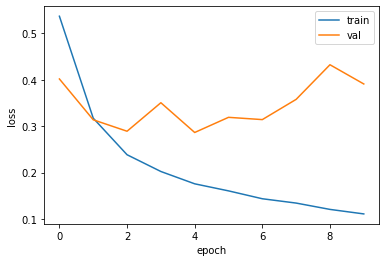

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 21s 27ms/step - loss: 0.4279 - acc: 0.8640


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.86464


In [ ]:
model.predict(x_test[0:1])

array([[0.97308075, 0.02691921]], dtype=float32)

In [ ]:
y_test[0]

0

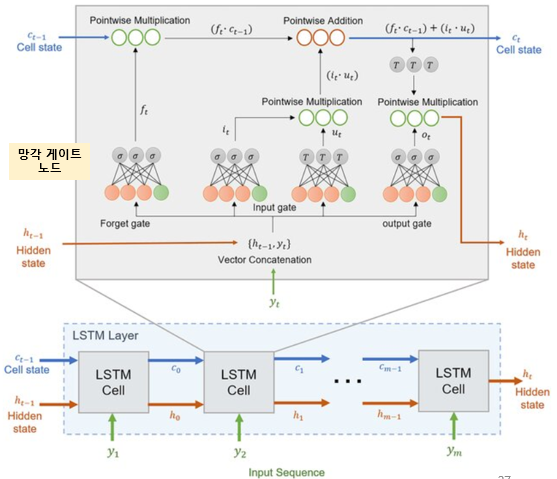